# Logistic Regression Study for Social Media Ad Analysis

## Introduction

This notebook aims to explore and apply a **Logistic Regression model** to predict whether a user will purchase a product after viewing an ad on a social media platform. We will use a **dataset containing users' demographic information**, such as age and estimated income, along with the response variable indicating whether the user made a purchase or not.

## Study Steps

The study will be divided into the following steps:

1. **Data Exploration and Preprocessing**

   - Reading the dataset  
   - Handling missing values  
   - Removing irrelevant columns  
   - Exploratory analysis (variable distribution, descriptive statistics)
     
2. **Data Visualization**

   - Analyzing relationships between variables  
   - Scatter plots and boxplots  

3. **Applying the Logistic Regression Model**

   - Splitting the data into training and testing sets  
   - Training the model  
   - Evaluating performance (confusion matrix, precision, recall, and F1-score metrics)  

4. **Interpreting the Results**

   - Understanding the impact of variables on the model  
   - Discussing possible improvements and limitations  

## Objective

The objective of this study is to deepen my knowledge of the **Logistic Regression algorithm**, exploring its applications, advantages, and limitations. 

In addition to applying the model to the specific problem of social media ad analysis, I will also seek to understand in which scenarios logistic regression performs well and where it may present weaknesses. 

This will provide a more critical perspective on its use in different contexts and allow comparisons with other classification models.

Let's begin the study by loading the data and analyzing its structure.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


# Exploration and preprocessing of data

In [2]:
df = pd.read_csv('../Social_Network_Ads.csv.xls')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# Check for null values
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Dropping Unnecessary Columns

Before starting the analysis, we need to drop the **User ID** column. 

This column is not useful for our predictions since it does not provide any meaningful information related to our target variable.

In [5]:
df = df.drop(['User ID'],axis=1)

In [6]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [7]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}\n")

Gender: ['Male' 'Female']

Age: [19 35 26 27 32 25 20 18 29 47 45 46 48 49 31 21 28 33 30 23 24 22 59 34
 39 38 37 42 40 36 41 58 55 52 60 56 53 50 51 57 44 43 54]

EstimatedSalary: [ 19000  20000  43000  57000  76000  58000  84000 150000  33000  65000
  80000  52000  86000  18000  82000  25000  26000  28000  29000  22000
  49000  41000  23000  30000  74000 137000  16000  44000  90000  27000
  72000  31000  17000  51000 108000  15000  79000  54000 135000  89000
  32000  83000  55000  48000 117000  87000  66000 120000  63000  68000
 113000 112000  42000  88000  62000 118000  85000  81000  50000 116000
 123000  73000  37000  59000 149000  21000  35000  71000  61000  75000
  53000 107000  96000  45000  47000 100000  38000  69000 148000 115000
  34000  60000  70000  36000  39000 134000 101000 130000 114000 142000
  78000 143000  91000 144000 102000 126000 133000 147000 104000 146000
 122000  97000  95000 131000  77000 125000 106000 141000  93000 138000
 119000 105000  99000 129000  46000  

## Exploratory Data Analysis (EDA)

**Understanding the Data Distribution**

We will begin by examining the distribution of each column using the **.describe()** method. This allows us to summarize key statistics such as mean, standard deviation, and percentiles.

In [8]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Visualizing Data Distributions

While **.describe()** provides valuable numerical summaries, visualizing the data can make patterns more apparent. 

**We will use boxplots to identify outliers in Ages and EstimatedSalary.**

Text(0.5, 0, 'Estimated Salary')

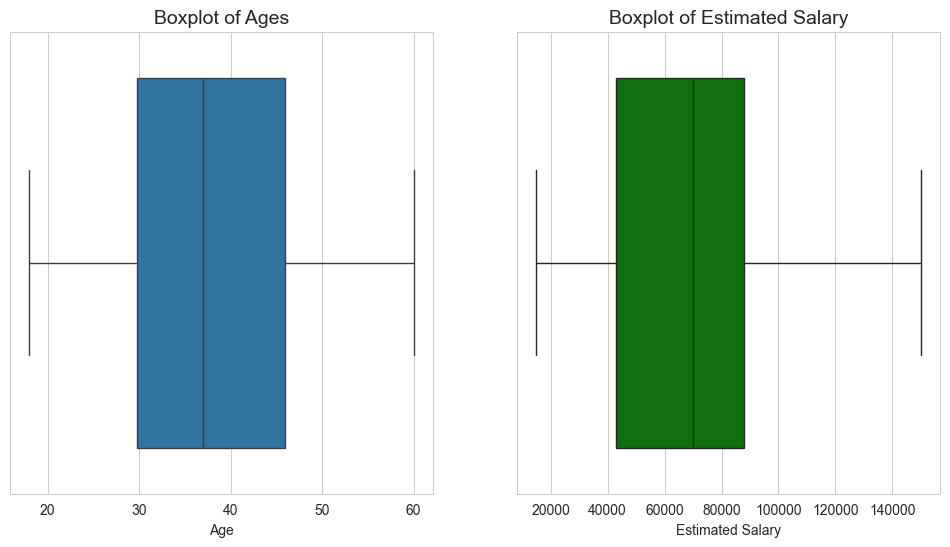

In [9]:
# Set Seaborn style
sns.set_style("whitegrid")

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 1. Boxplot for Age Distribution (Detect Outliers)
sns.boxplot(x=df["Age"], ax=axes[0])
axes[0].set_title("Boxplot of Ages", fontsize=14)
axes[0].set_xlabel("Age")

# 2. Boxplot for Estimated Salary Distribution (Detect Outliers)
sns.boxplot(x=df["EstimatedSalary"], color="green", ax=axes[1])
axes[1].set_title("Boxplot of Estimated Salary", fontsize=14)
axes[1].set_xlabel("Estimated Salary")


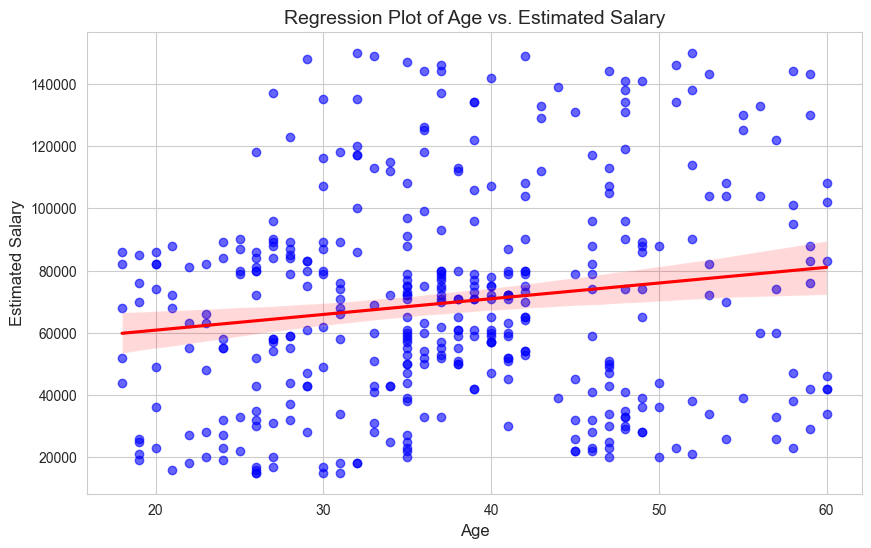

In [10]:
# Set plot style
sns.set_style("whitegrid")

# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=df["Age"], y=df["EstimatedSalary"], color="blue", scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

# Titles and labels
plt.title("Regression Plot of Age vs. Estimated Salary", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Estimated Salary", fontsize=12)

# Show the plot
plt.show()


There is a weak positive correlation between Age and Salary.

Age alone is not a strong predictor of Salary, as indicated by the wide scatter.

# Data Preprocessing

### **Handling Categorical Variables**

* Most machine learning models require numerical inputs, so we need to convert categorical variables into numbers.


### **Checking Data Types**

First, we inspect our dataset to identify categorical variables.

* df.dtypes


### **Encoding Categorical Data**

Since models cannot work directly with categorical data, we must transform them into numerical values.

* We will use Label Encoding for binary categories (e.g., Male/Female).

* **from sklearn.preprocessing import LabelEncoder**

This transformation is also essential for computing correlation matrices, as correlation coefficients require numerical values.

In [11]:
#1
df.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [12]:
#2
#Right our only categorical data is the Gender column as a type object, lets transform it with Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, FunctionTransformer

# Function to transform Gender column
def label_encode_gender(df):
    encoder = LabelEncoder()
    df['Gender'] = encoder.fit_transform(df['Gender'])
    return df

# Create a pipeline with a custom transformer
pipeline = Pipeline([
    ('gender_label_encoding', FunctionTransformer(label_encode_gender))
])

# Transform the data
df_transformed = pipeline.fit_transform(df)
print(df_transformed)

     Gender  Age  EstimatedSalary  Purchased
0         1   19            19000          0
1         1   35            20000          0
2         0   26            43000          0
3         0   27            57000          0
4         1   19            76000          0
..      ...  ...              ...        ...
395       0   46            41000          1
396       1   51            23000          1
397       0   50            20000          1
398       1   36            33000          0
399       0   49            36000          1

[400 rows x 4 columns]


Now that we have transformed our categorical value into numerical, we can also see the correlation coefficient between our variables and the target value.

In [13]:
for i in df.columns:
    coef = np.corrcoef(df[i], df["Purchased"])[0,1]
    if i != 'Purchased':
        print(f"Correlation Coefficient of {i} x Purchased: {coef:.3f}")
    else: 
        break

Correlation Coefficient of Gender x Purchased: -0.042
Correlation Coefficient of Age x Purchased: 0.622
Correlation Coefficient of EstimatedSalary x Purchased: 0.362


## Correlation Coefficient of Gender X Purchased is negative and very close to 0. Is that correct?

Actually, it is right, and this is valuable information for us. But first, let's understand what happened:

* The Pearson correlation coefficient (which is commonly used) measures linear relationships between two variables. 

* When both variables are binary (0 and 1), **the correlation becomes a measure of how often they match or differ.**

    - If the correlation is positive, Gender = 1 is more likely to result in Target = 1.
    - If the correlation is negative, Gender = 1 is more likely to result in Target = 0.

### **Key Result**

* With a correlation of -0.042, it indicates that Gender has no significant impact on whether a person makes a purchase.

* In other words, **there is no meaningful difference between male and female purchasing behavior in this dataset.**


## We have it all for the Logistic Regression model

1. The data is all numerical
2. The data is properly cleaned
3. The data doesn`t contain null values or missing values

# Developing our model

1. Separate the X values and Y value that is the target (Purchased)
2. Use the **train_test_split** to properly separate our data on training and test.
3. Fit the model **Logistic Regression**, with the training data.
4. At last see our model scoring

In [14]:
#1
X = df.drop(columns = ['Purchased'], axis=1)
y = df['Purchased']

In [15]:
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [17]:
#2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) 

In [18]:
#3
model = LogisticRegression(solver = 'liblinear', random_state = 42) #liblinear is good for small datasets
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [19]:
#4
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.66      1.00      0.79        52
           1       1.00      0.04      0.07        28

    accuracy                           0.66        80
   macro avg       0.83      0.52      0.43        80
weighted avg       0.78      0.66      0.54        80



We have a huge problem here, the recall score for the 1 label is pretty bad

The recall score of the label 1 tells us that the model only identified 4% of the true instances of class 

**But that can be fixed right? Well we can try**   

## Fixing the disproportional data

For better undertanding, this miss classification is normally caused by disproportional datasets, where one class have much more data then the other. 

* First lets check the **Purchased** data to see its proportion



In [20]:
#1
df.Purchased.value_counts(1)

Purchased
0    0.6425
1    0.3575
Name: proportion, dtype: float64

Well that could have been worst, we have 64% of class 0 present in the data and 35% od class 1.

Lets try to bring that to a 50/50 proportion with a technic called **SMOTE**, that creates data for the class that has less data.

* **from imblearn.over_sampling import SMOTE**

In [21]:
X = df.drop(columns = ['Purchased'], axis=1)
y = df['Purchased']

In [22]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

sm = SMOTE(random_state=42)

X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)


### See that we have only applyed SMOTE after the train_test_split function?

Well we did that to prevent **data leakage**, that can occur when information from outside the training dataset is used to create the model, and that can be a huge performance problem.

If we apply SMOTE **after** the **train_test_split**:

* The model is trained on a balanced dataset.

* The test set remains representative of real-world data, often imbalanced.

* The evaluation accurately reflects how the model will perform on unseen data.


If we apply SMOTE **before** the **train_test_split**:

* Synthetic samples are generated using information from the entire dataset.

* Some of this synthetic information (based on test data) leaks into the training data.

* The model sees data derived from the test set during training, leading to:
    - Overfitting
    - Unrealistic performance evaluation (too optimistic)

In [23]:
from collections import Counter
print("Class distribution before resampling:", Counter(y_train))
print("Class distribution after resampling:", Counter(y_train_SMOTE))

Class distribution before resampling: Counter({0: 205, 1: 115})
Class distribution after resampling: Counter({0: 205, 1: 205})


After applying SMOTE we got a 50/50 proportion with 205 to class 0 and 205 to class 1.

But thats not all, we might have a problem with our data when dealing with **Logistic Regression**, that is not the proportion, lets take a look at the distribution of the data in the Ages column and the EstimatedSalary.

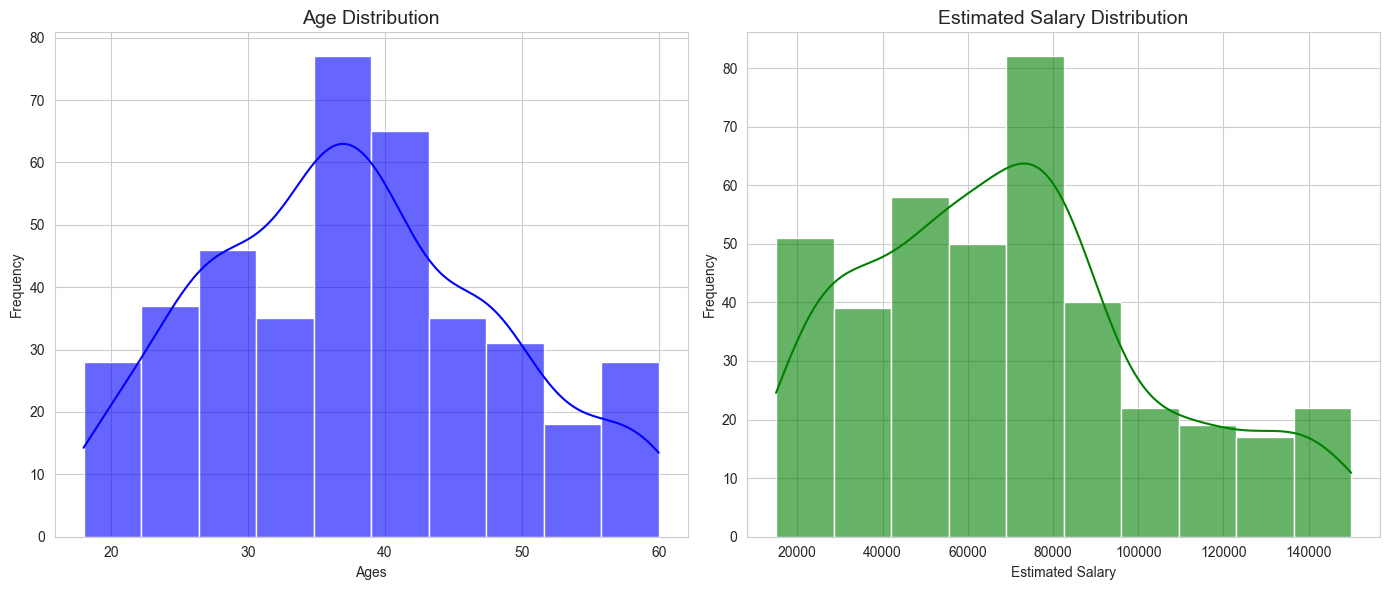

In [24]:
# Set plot style
sns.set_style("whitegrid")

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for Ages
sns.histplot(df["Age"], bins=10, kde=True, color="blue", alpha=0.6, ax=axes[0])
axes[0].set_title("Age Distribution", fontsize=14)
axes[0].set_xlabel("Ages")
axes[0].set_ylabel("Frequency")

# Histogram for Estimated Salary
sns.histplot(df["EstimatedSalary"], bins=10, kde=True, color="green", alpha=0.6, ax=axes[1])
axes[1].set_title("Estimated Salary Distribution", fontsize=14)
axes[1].set_xlabel("Estimated Salary")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

What we get from this graphs is that we have data that is very different from each other, because in age we have distributions from **10 -> 60**, and with salaries we have from **10000 -> 160000**, this are very different scales from each other. 

**But why is that a problem?**

That can cause our model to think that salaries might be more important than age, prioritizing only one variable and making the optimization process imbalanced and slow.

## Why is it bad to have this data spread like this?

It is bad, because in the **Logistic Regression** model we have:

*  Gradient Descent Convergence Issues

    - The optimization algorithm Gradient Descent works best when all features area on a **similar scale**
    - Large-scale features like salaries can cause some weights to be updated much faster than others, making convergence slow or even preventing it from reaching the global minimum.

* Feature Importance Distortion

    - The model assigns coefficients based on feature values.
    - If one feature like salaries, has values much larger than others, its coefficient will also be disproportionately larger, which can distort the real importance of the feature.

### **What can i do to solve this issues?**

* We can use the Standard Scaler from **sklearn.preprocessing** module to transform data to have:

    - Mean = 0
    - Standard Deviation = 1

* Standardizing the model puts everything in the same range, ensuring that no feature dominates just beacuse of its scale (salaries over age).

In [25]:
from sklearn.preprocessing import StandardScaler
# Define numeric and categorical columns
numeric_features = ['Age', 'EstimatedSalary']
gender_features = ['Gender']

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Apply StandardScaler to numeric features
        ('cat', 'passthrough', gender_features)  # Leave Gender unchanged
    ]
)

# Create a pipeline with preprocessing and Logistic Regression
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(solver = 'liblinear' ,random_state=42))
])

# Fit the pipeline with the training data from SMOTE
pipeline.fit(X_train_SMOTE, y_train_SMOTE)

# Predict and evaluate
y_pred = pipeline.predict(X_test)

In [26]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        52
           1       0.80      0.86      0.83        28

    accuracy                           0.88        80
   macro avg       0.86      0.87      0.86        80
weighted avg       0.88      0.88      0.88        80



## Way better!

By standardizing the data, we observed a significant improvement in our model's classification performance. This highlights the importance of having a well-balanced dataset with values that follow a consistent scale.

# To improve

1. We`ve discovered that the gender has a **-0.042** Correlation Coefficient, a pretty low one. So can we remove the **Gender** column and have better results?
2. Add a Pipeline to our first model, to improve the code.
3. Try this dataset in other algorithms.